In [1]:
import pandas as pd

In [4]:
## loading train and test data
train = pd.read_csv(r'D:\Data sc projects\notebook\data\train.csv')
test = pd.read_csv(r'D:\Data sc projects\notebook\data\test.csv')


In [5]:
train.head(5)

,ID,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year,price
0,0,"38 Adelina Grove, London, E1 3AD",E1 3AD,England,E1,51.519406,-0.053261,NaN,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000
1,1,"6 Cleveland Grove, London, E1 4XL",E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995
2,2,"65 Sanderstead Road, London, E10 7PW",E10 7PW,England,E10,51.569054,-0.034892,1.0,3.0,84.0,1.0,Freehold,Terrace Property,D,1,1995,59000
3,3,"5 Queenswood Gardens, London, E11 3SE",E11 3SE,England,E11,51.564212,0.026292,NaN,2.0,72.0,1.0,Leasehold,Purpose Built Flat,NaN,1,1995,51500
4,4,"12 Woodlands Road, London, E11 4RW",E11 4RW,England,E11,51.563430,0.006260,1.0,3.0,104.0,1.0,Freehold,Mid Terrace House,D,1,1995,63500


In [6]:
test.head(5)

,ID,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year
0,266325,"Flat 7, Philip House, Heneage Street, London, ...",E1 5LW,England,E1,51.518783,-0.071003,1.0,2.0,54.0,1.0,Leasehold,Flat/Maisonette,D,1,2024
1,266326,"17 Bowmans Mews, London, E1 8RY",E1 8RY,England,E1,51.511624,-0.068236,1.0,1.0,48.0,1.0,Leasehold,Purpose Built Flat,D,1,2024
2,266327,"Flat 30, Everard House, Boyd Street, London, E...",E1 1LY,England,E1,51.512737,-0.066502,1.0,NaN,32.0,NaN,Leasehold,Flat/Maisonette,C,1,2024
3,266328,"Flat 1, Wilton Court, Cavell Street, London, E...",E1 2BN,England,E1,51.516165,-0.057334,1.0,3.0,85.0,1.0,Leasehold,Purpose Built Flat,D,1,2024
4,266329,"45 Musbury Street, London, E1 0PJ",E1 0PJ,England,E1,51.515115,-0.051008,1.0,2.0,82.0,1.0,Leasehold,Flat/Maisonette,C,1,2024


Lets Begin with Data Cleaning

In [7]:
## Data cleaning
missing_train = train.isnull().sum().sort_values(ascending=False)
missing_test = test.isnull().sum().sort_values(ascending=False)

In [8]:
print(f'Missing train data {missing_train}')
print('----------------------------')
print(f'Missing test data {missing_test}')

Missing train data currentEnergyRating    56814
bathrooms              48479
livingRooms            37040
bedrooms               24843
floorAreaSqM           13806
tenure                  5721
propertyType             508
sale_year                  0
sale_month                 0
ID                         0
fullAddress                0
longitude                  0
latitude                   0
outcode                    0
country                    0
postcode                   0
price                      0
dtype: int64
----------------------------
Missing test data bathrooms              2624
livingRooms            2095
floorAreaSqM           2006
currentEnergyRating    1497
bedrooms               1375
tenure                  590
propertyType            167
ID                        0
fullAddress               0
postcode                  0
country                   0
outcode                   0
latitude                  0
longitude                 0
sale_month                0
sale_yea

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   266325 non-null  int64  
 1   fullAddress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            217846 non-null  float64
 8   bedrooms             241482 non-null  float64
 9   floorAreaSqM         252519 non-null  float64
 10  livingRooms          229285 non-null  float64
 11  tenure               260604 non-null  object 
 12  propertyType         265817 non-null  object 
 13  currentEnergyRating  209511 non-null  object 
 14  sale_month           266325 non-null  int64  
 15  sale_year        

In [10]:
## covering columns into lowercase
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [11]:
train.head()

,id,fulladdress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,propertytype,currentenergyrating,sale_month,sale_year,price
0,0,"38 Adelina Grove, London, E1 3AD",E1 3AD,England,E1,51.519406,-0.053261,NaN,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000
1,1,"6 Cleveland Grove, London, E1 4XL",E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995
2,2,"65 Sanderstead Road, London, E10 7PW",E10 7PW,England,E10,51.569054,-0.034892,1.0,3.0,84.0,1.0,Freehold,Terrace Property,D,1,1995,59000
3,3,"5 Queenswood Gardens, London, E11 3SE",E11 3SE,England,E11,51.564212,0.026292,NaN,2.0,72.0,1.0,Leasehold,Purpose Built Flat,NaN,1,1995,51500
4,4,"12 Woodlands Road, London, E11 4RW",E11 4RW,England,E11,51.563430,0.006260,1.0,3.0,104.0,1.0,Freehold,Mid Terrace House,D,1,1995,63500


In [12]:
test.head()

,id,fulladdress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,propertytype,currentenergyrating,sale_month,sale_year
0,266325,"Flat 7, Philip House, Heneage Street, London, ...",E1 5LW,England,E1,51.518783,-0.071003,1.0,2.0,54.0,1.0,Leasehold,Flat/Maisonette,D,1,2024
1,266326,"17 Bowmans Mews, London, E1 8RY",E1 8RY,England,E1,51.511624,-0.068236,1.0,1.0,48.0,1.0,Leasehold,Purpose Built Flat,D,1,2024
2,266327,"Flat 30, Everard House, Boyd Street, London, E...",E1 1LY,England,E1,51.512737,-0.066502,1.0,NaN,32.0,NaN,Leasehold,Flat/Maisonette,C,1,2024
3,266328,"Flat 1, Wilton Court, Cavell Street, London, E...",E1 2BN,England,E1,51.516165,-0.057334,1.0,3.0,85.0,1.0,Leasehold,Purpose Built Flat,D,1,2024
4,266329,"45 Musbury Street, London, E1 0PJ",E1 0PJ,England,E1,51.515115,-0.051008,1.0,2.0,82.0,1.0,Leasehold,Flat/Maisonette,C,1,2024


In [13]:
missing_train_percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_test_percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)

In [14]:
test.isnull().sum()

id                        0
fulladdress               0
postcode                  0
country                   0
outcode                   0
latitude                  0
longitude                 0
bathrooms              2624
bedrooms               1375
floorareasqm           2006
livingrooms            2095
tenure                  590
propertytype            167
currentenergyrating    1497
sale_month                0
sale_year                 0
dtype: int64

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   266325 non-null  int64  
 1   fulladdress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            217846 non-null  float64
 8   bedrooms             241482 non-null  float64
 9   floorareasqm         252519 non-null  float64
 10  livingrooms          229285 non-null  float64
 11  tenure               260604 non-null  object 
 12  propertytype         265817 non-null  object 
 13  currentenergyrating  209511 non-null  object 
 14  sale_month           266325 non-null  int64  
 15  sale_year        

In [16]:
## imputing missing data of numerical columns
num_col = ['bathrooms','livingrooms','bedrooms','floorareasqm']
for col in num_col:
  train[col].fillna(train[col].median(),inplace=True)
  test[col].fillna(test[col].median(),inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_2688\330050535.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_2688\330050535.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [17]:
## Imputing missing data for categorical columns with mode or unknown
train['tenure'] = train['tenure'].fillna('Unknown')
train['propertytype'] = train['propertytype'].fillna(train['propertytype'].mode()[0])
train['currentenergyrating'] = train['currentenergyrating'].fillna(train['currentenergyrating'].mode()[0])

## for test data
test['tenure'] = test['tenure'].fillna('Unknown')
test['propertytype'] = test['propertytype'].fillna(test['propertytype'].mode()[0])
test['currentenergyrating'] = test['currentenergyrating'].fillna(test['currentenergyrating'].mode()[0])




In [18]:
train.head(5)

,id,fulladdress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,propertytype,currentenergyrating,sale_month,sale_year,price
0,0,"38 Adelina Grove, London, E1 3AD",E1 3AD,England,E1,51.519406,-0.053261,1.0,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000
1,1,"6 Cleveland Grove, London, E1 4XL",E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995
2,2,"65 Sanderstead Road, London, E10 7PW",E10 7PW,England,E10,51.569054,-0.034892,1.0,3.0,84.0,1.0,Freehold,Terrace Property,D,1,1995,59000
3,3,"5 Queenswood Gardens, London, E11 3SE",E11 3SE,England,E11,51.564212,0.026292,1.0,2.0,72.0,1.0,Leasehold,Purpose Built Flat,D,1,1995,51500
4,4,"12 Woodlands Road, London, E11 4RW",E11 4RW,England,E11,51.563430,0.006260,1.0,3.0,104.0,1.0,Freehold,Mid Terrace House,D,1,1995,63500


EDA

In [19]:
## Basic Overview
print(train.shape)
print(test.shape)
train.describe()

(266325, 17)
(16547, 16)


,id,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,sale_month,sale_year,price
count,266325.000000,266325.000000,266325.000000,266325.000000,266325.000000,266325.000000,266325.000000,266325.000000,266325.000000,2.663250e+05
mean,133162.000000,51.510090,-0.104639,1.359474,2.449860,98.865991,1.251527,6.805670,2012.213855,6.161788e+05
std,76881.549558,0.056709,0.088074,0.674093,1.125486,55.067459,0.550333,3.356693,9.143113,1.274105e+06
min,0.000000,51.385708,-0.347055,1.000000,1.000000,10.000000,1.000000,1.000000,1995.000000,1.000000e+04
25%,66581.000000,51.466685,-0.159167,1.000000,2.000000,64.000000,1.000000,4.000000,2004.000000,2.165000e+05
50%,133162.000000,51.507202,-0.108622,1.000000,2.000000,85.000000,1.000000,7.000000,2014.000000,3.850000e+05
75%,199743.000000,51.550937,-0.049202,2.000000,3.000000,115.000000,1.000000,10.000000,2021.000000,6.500000e+05
max,266324.000000,51.665823,0.139249,9.000000,9.000000,500.000000,9.000000,12.000000,2023.000000,1.000000e+08


In [20]:
## Target Variable price
import matplotlib.pyplot as  plt
import seaborn as sns

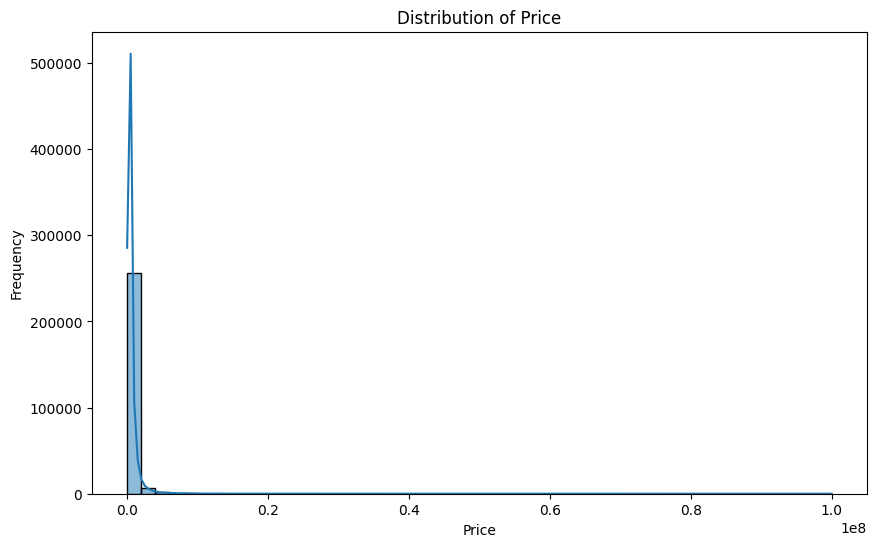

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(train['price'],kde=True,bins=50)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The distribution is extremely right-skewed, with a long tail of very high-priced properties.

Most house prices are clustered near the lower end, suggesting the presence of outliers or luxury properties.


In [22]:
## Log transformation of tatget variable
import numpy as np
train['logprice'] = np.log(train['price'])

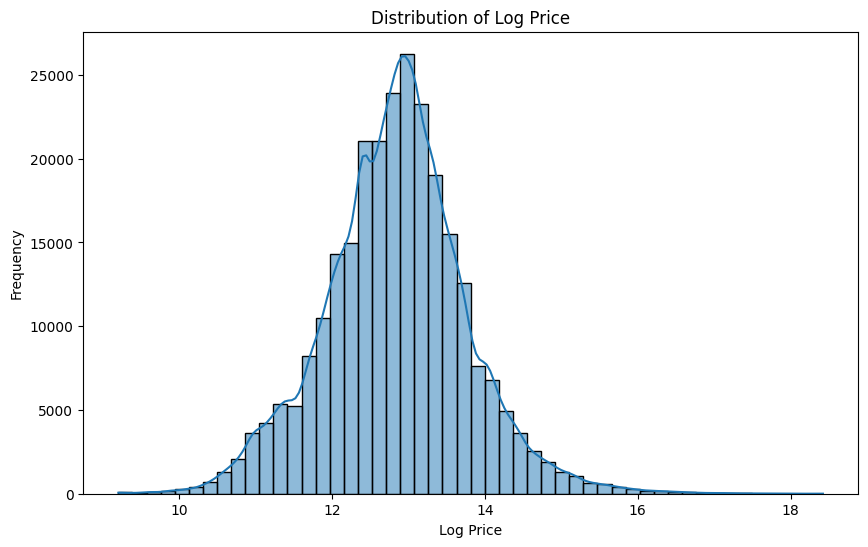

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(train['logprice'],kde=True,bins=50)
plt.title('Distribution of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

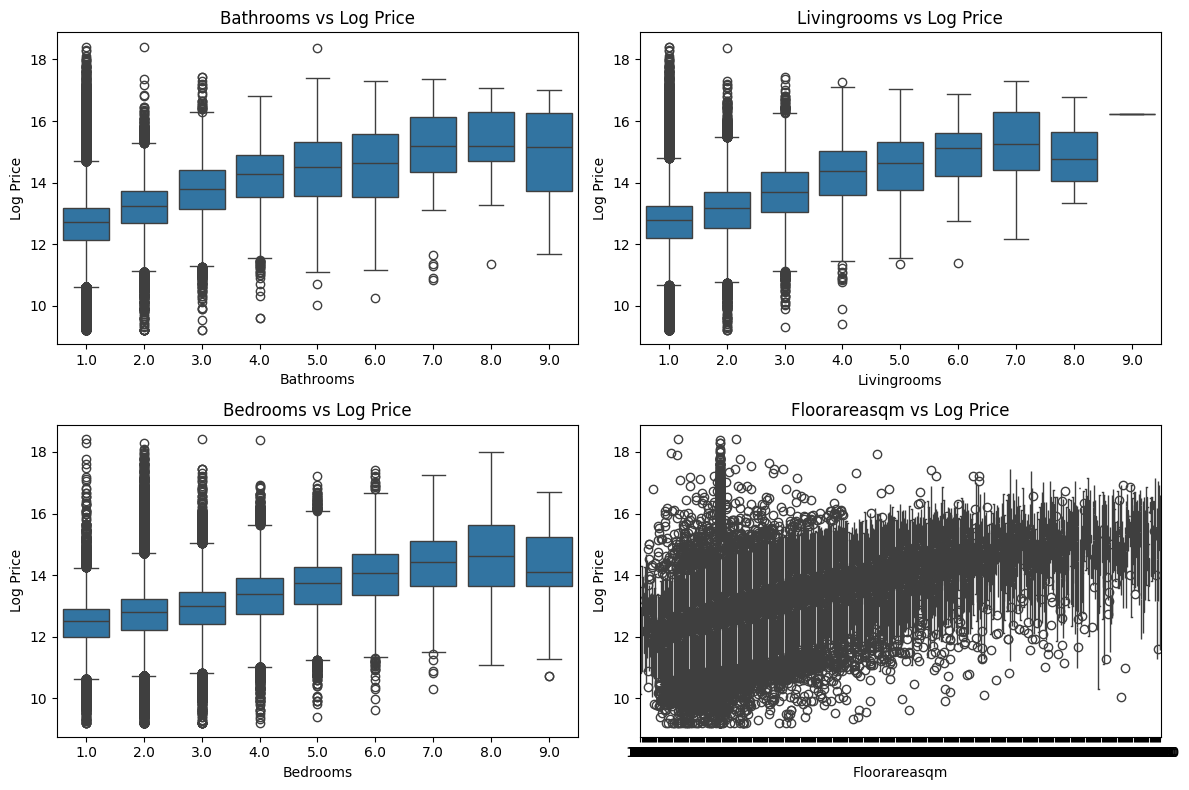

In [24]:
num_col = ['bathrooms','livingrooms','bedrooms','floorareasqm']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, col in enumerate(num_col):
    sns.boxplot(x=train[col], y=train['logprice'], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{col.capitalize()} vs Log Price')
    axes[i // 2, i % 2].set_xlabel(col.capitalize())
    axes[i // 2, i % 2].set_ylabel('Log Price')

plt.tight_layout()
plt.show()


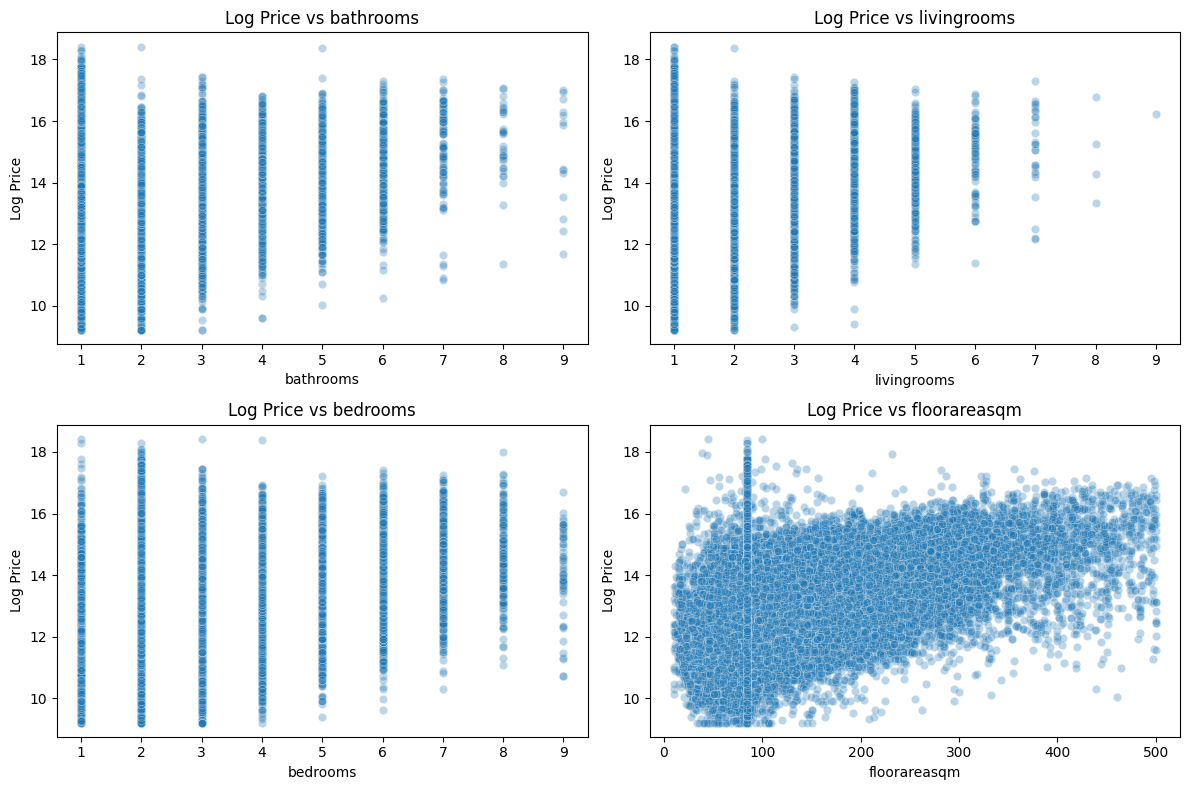

In [25]:
## Scatterplot for num features vs target
num_col = ['bathrooms','livingrooms','bedrooms','floorareasqm']
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
axes = axes.flatten()
for i,col in enumerate(num_col):
  sns.scatterplot(x=train[col],y=train['logprice'],ax=axes[i],alpha=0.3)
  axes[i].set_title(f'Log Price vs {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Log Price')
plt.tight_layout()
plt.show()

In [26]:
## Categorical feature analysis
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   266325 non-null  int64  
 1   fulladdress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            266325 non-null  float64
 8   bedrooms             266325 non-null  float64
 9   floorareasqm         266325 non-null  float64
 10  livingrooms          266325 non-null  float64
 11  tenure               266325 non-null  object 
 12  propertytype         266325 non-null  object 
 13  currentenergyrating  266325 non-null  object 
 14  sale_month           266325 non-null  int64  
 15  sale_year        

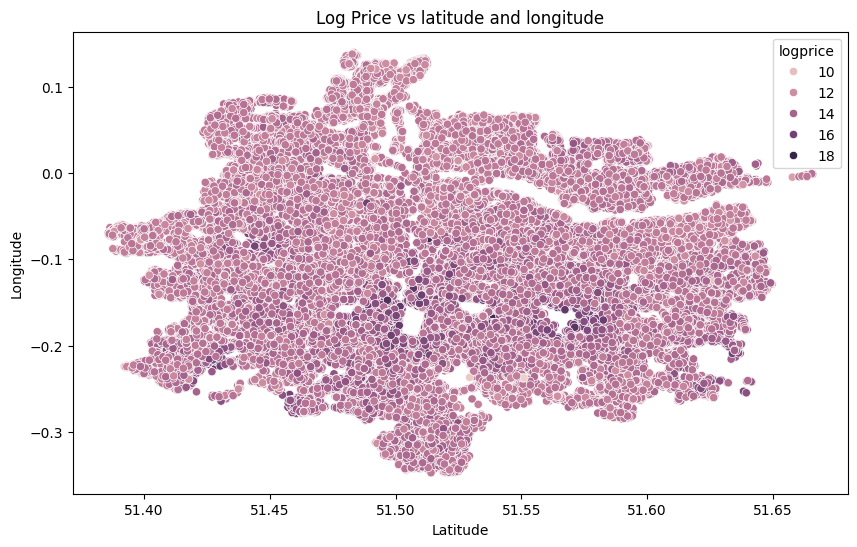

In [27]:
## plot log price vs latitude and longitude
plt.figure(figsize=(10,6))
sns.scatterplot(x=train['latitude'],y=train['longitude'],hue=train['logprice'])
plt.title('Log Price vs latitude and longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [28]:
## Kmeans clustering on latitude and longitude to separate location based patterns
from sklearn.cluster import KMeans

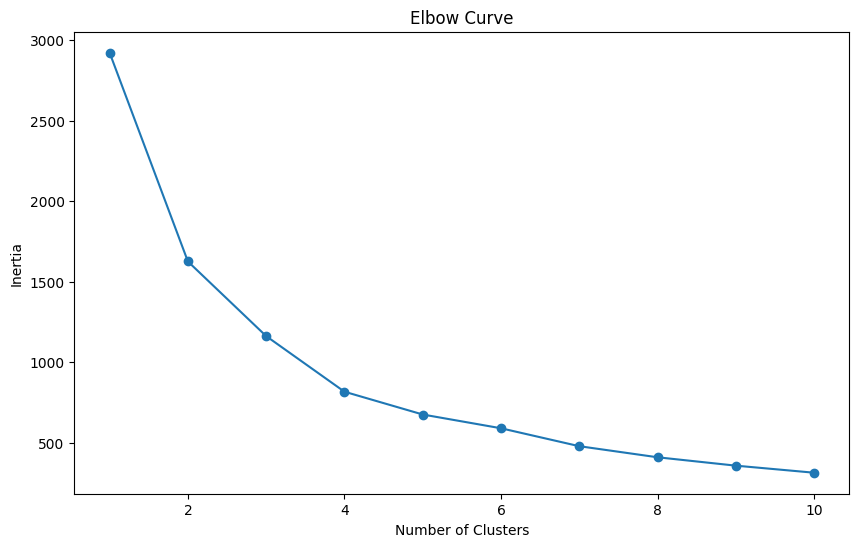

In [29]:
## Use elbow method to find cluster value
coords = train[['latitude', 'longitude']].dropna()
inertia = []
cluster_range = range(1,11)
for k in cluster_range:
  kmeans = KMeans(n_clusters=k,random_state=42,init ='k-means++')
  kmeans.fit(coords)
  inertia.append(kmeans.inertia_)

## plotting the elbow curve
plt.figure(figsize=(10,6))
plt.plot(cluster_range,inertia,marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
## takin k value 4 after elbow method
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(coords)


KMeans(n_clusters=4, random_state=42)

In [31]:
train['location_cluster']  = kmeans.fit_predict(coords)

In [32]:
train['location_cluster']

0         1
1         1
2         1
3         0
4         0
         ..
266320    1
266321    1
266322    1
266323    1
266324    2
Name: location_cluster, Length: 266325, dtype: int32

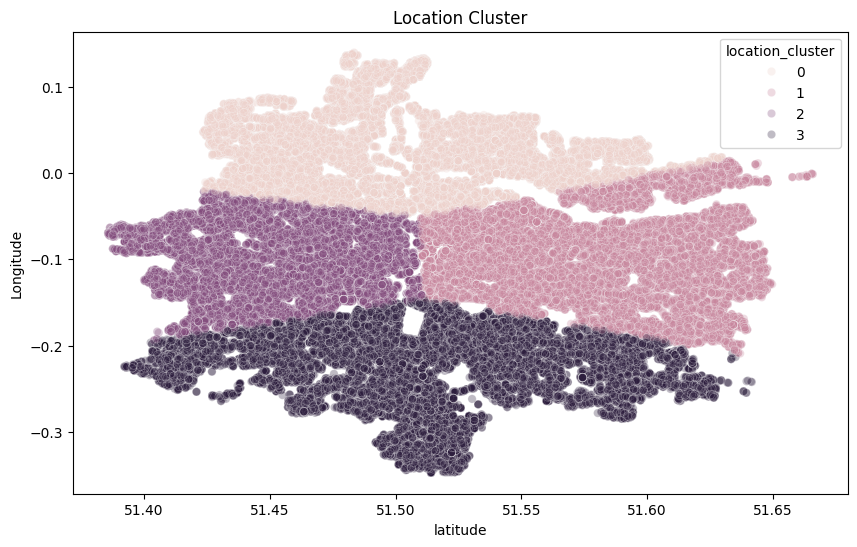

In [33]:
## Visualising Location Cluster
plt.figure(figsize=(10,6))
sns.scatterplot(x=train['latitude'],y=train['longitude'],hue=train['location_cluster'],alpha=0.3)
plt.title('Location Cluster')
plt.xlabel('latitude')
plt.ylabel('Longitude')
plt.show()

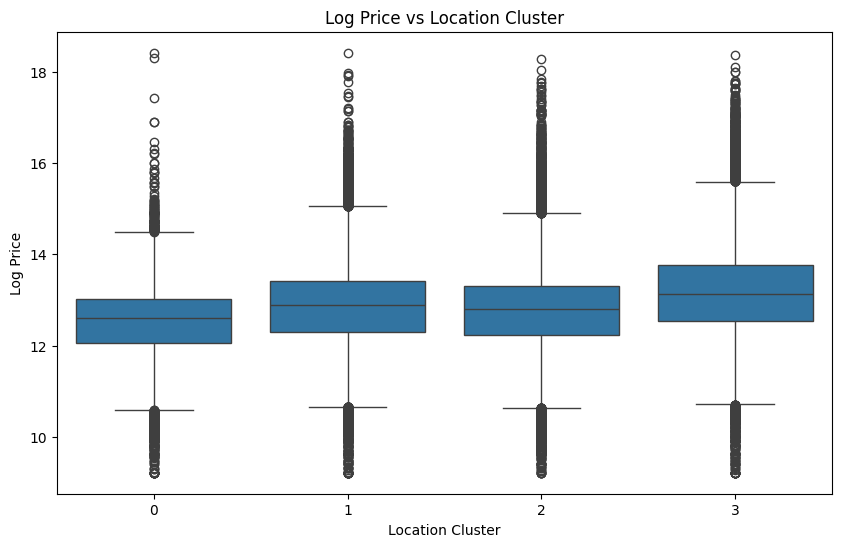

In [34]:
## Check cluster effect on price now
plt.figure(figsize=(10,6))
sns.boxplot(x=train['location_cluster'],y=train['logprice'])
plt.title('Log Price vs Location Cluster')
plt.xlabel('Location Cluster')
plt.ylabel('Log Price')
plt.show()

In [35]:
## location cluster on test data
test['location_cluster'] = kmeans.predict(test[['latitude', 'longitude']])


In [36]:
test.head(2)

,id,fulladdress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,propertytype,currentenergyrating,sale_month,sale_year,location_cluster
0,266325,"Flat 7, Philip House, Heneage Street, London, ...",E1 5LW,England,E1,51.518783,-0.071003,1.0,2.0,54.0,1.0,Leasehold,Flat/Maisonette,D,1,2024,1
1,266326,"17 Bowmans Mews, London, E1 8RY",E1 8RY,England,E1,51.511624,-0.068236,1.0,1.0,48.0,1.0,Leasehold,Purpose Built Flat,D,1,2024,1


In [37]:
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

['fulladdress', 'postcode', 'country', 'outcode', 'tenure', 'propertytype', 'currentenergyrating']


In [38]:
## checking unique values
for col in categorical_cols:
  print(f'{col}: {train[col].nunique()} unique values')


fulladdress: 118345 unique values
postcode: 45064 unique values
country: 1 unique values
outcode: 167 unique values
tenure: 5 unique values
propertytype: 19 unique values
currentenergyrating: 7 unique values


In [39]:
train.head(2)

,id,fulladdress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,propertytype,currentenergyrating,sale_month,sale_year,price,logprice,location_cluster
0,0,"38 Adelina Grove, London, E1 3AD",E1 3AD,England,E1,51.519406,-0.053261,1.0,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000,11.251561,1
1,1,"6 Cleveland Grove, London, E1 4XL",E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995,11.407509,1


 Multivariate Plots with Subplots for Categorical Features

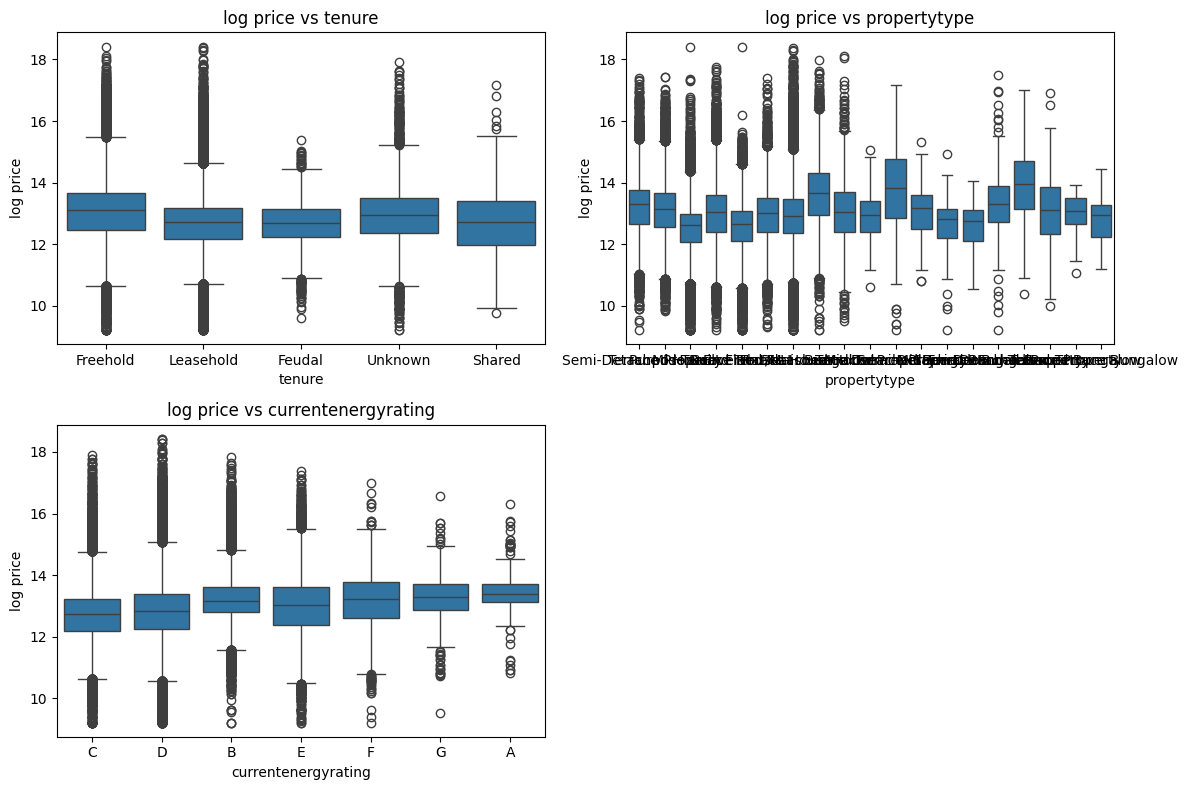

In [40]:
cat_cols = ['tenure','propertytype','currentenergyrating']
n_cols = 2
n_rows = (len(cat_cols)+1)//n_cols
fig,axes = plt.subplots(n_rows,n_cols,figsize=(12,8))
axes = axes.flatten()
for i,col in enumerate(cat_cols):
  sns.boxplot(x=train[col],y=train['logprice'],ax=axes[i])
  axes[i].set_title(f'log price vs {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('log price')
for j in range(i+1,n_rows*n_cols):
  fig.delaxes(axes[j])
plt.tight_layout

plt.tight_layout()
plt.show()


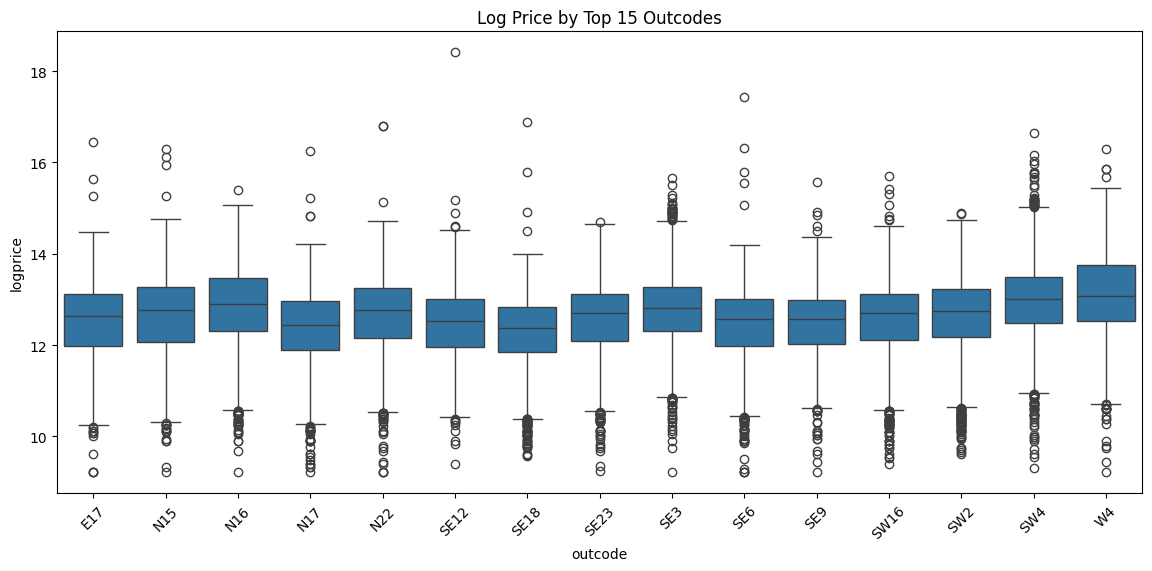

In [41]:
top_outcodes = train['outcode'].value_counts().head(15).index
train_top_out = train[train['outcode'].isin(top_outcodes)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=train_top_out, x='outcode', y='logprice')
plt.title("Log Price by Top 15 Outcodes")
plt.xticks(rotation=45)
plt.show()


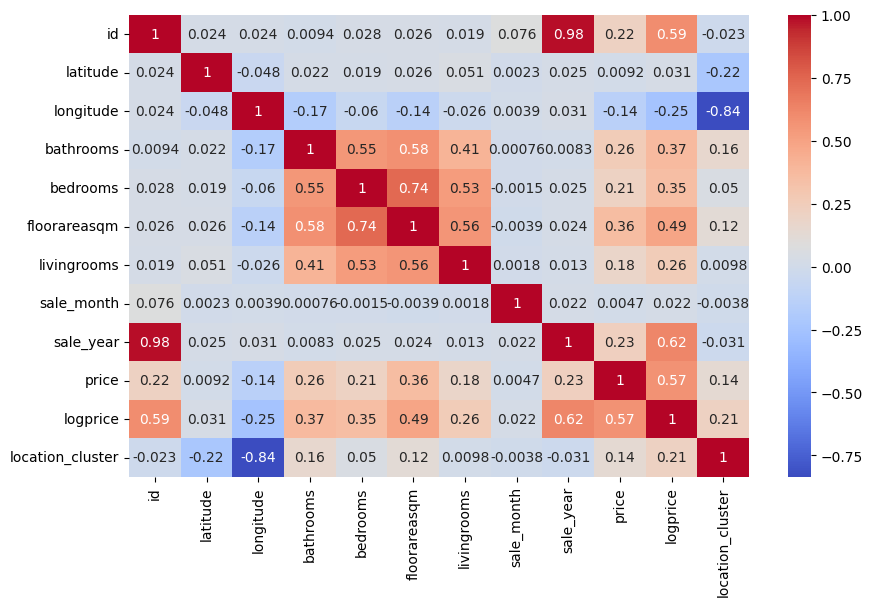

In [42]:
##Correlation Heatmap (Numeric Only)
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

In [43]:
train.head(2)

,id,fulladdress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,propertytype,currentenergyrating,sale_month,sale_year,price,logprice,location_cluster
0,0,"38 Adelina Grove, London, E1 3AD",E1 3AD,England,E1,51.519406,-0.053261,1.0,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000,11.251561,1
1,1,"6 Cleveland Grove, London, E1 4XL",E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995,11.407509,1


In [44]:
corr_matrix = train.corr(numeric_only=True).abs()
upper_triangle =corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [45]:
to_drop = []
for col in upper_triangle.columns:
    for row in upper_triangle.index:
        corr_val = upper_triangle.loc[row,col]
        if corr_val >0.8:
            to_drop.append(col)
            print(f'Dropping {col} due to high correlation with {row} ({corr_val})')


Dropping sale_year due to high correlation with id (0.9819739228684418)
Dropping location_cluster due to high correlation with longitude (0.8353112757372626)


In [46]:
cols_to_drop = ['id','fulladdress']
train.drop(columns=cols_to_drop,inplace=True)
test.drop(columns=cols_to_drop,inplace=True)

In [47]:
train.head(2)

,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,propertytype,currentenergyrating,sale_month,sale_year,price,logprice,location_cluster
0,E1 3AD,England,E1,51.519406,-0.053261,1.0,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000,11.251561,1
1,E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995,11.407509,1


In [48]:
train.columns

Index(['postcode', 'country', 'outcode', 'latitude', 'longitude', 'bathrooms',
       'bedrooms', 'floorareasqm', 'livingrooms', 'tenure', 'propertytype',
       'currentenergyrating', 'sale_month', 'sale_year', 'price', 'logprice',
       'location_cluster'],
      dtype='object')

In [49]:
train.head(2)

,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,propertytype,currentenergyrating,sale_month,sale_year,price,logprice,location_cluster
0,E1 3AD,England,E1,51.519406,-0.053261,1.0,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000,11.251561,1
1,E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995,11.407509,1


Feature Engineering

In [50]:
train.head(5)

,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,propertytype,currentenergyrating,sale_month,sale_year,price,logprice,location_cluster
0,E1 3AD,England,E1,51.519406,-0.053261,1.0,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000,11.251561,1
1,E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995,11.407509,1
2,E10 7PW,England,E10,51.569054,-0.034892,1.0,3.0,84.0,1.0,Freehold,Terrace Property,D,1,1995,59000,10.985293,1
3,E11 3SE,England,E11,51.564212,0.026292,1.0,2.0,72.0,1.0,Leasehold,Purpose Built Flat,D,1,1995,51500,10.849337,0
4,E11 4RW,England,E11,51.563430,0.006260,1.0,3.0,104.0,1.0,Freehold,Mid Terrace House,D,1,1995,63500,11.058795,0


In [51]:
train['sale_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [52]:
## season from sale_month
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'summer'
    else:
        return 'Autumn'

In [53]:
train['season'] = train['sale_month'].apply(get_season)
test['season'] = test['sale_month'].apply(get_season)

In [54]:
train.head(2)

,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,propertytype,currentenergyrating,sale_month,sale_year,price,logprice,location_cluster,season
0,E1 3AD,England,E1,51.519406,-0.053261,1.0,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000,11.251561,1,Winter
1,E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995,11.407509,1,Winter


In [55]:
## total_rooms
train['total_rooms'] = train['bathrooms'] + train['livingrooms'] + train['bedrooms']
test['total_rooms'] =  test['bathrooms'] + test['livingrooms'] + test['bedrooms']

In [56]:
train.head(2)

,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,propertytype,currentenergyrating,sale_month,sale_year,price,logprice,location_cluster,season,total_rooms
0,E1 3AD,England,E1,51.519406,-0.053261,1.0,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000,11.251561,1,Winter,5.0
1,E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995,11.407509,1,Winter,7.0


In [57]:
len(train['outcode'].unique())

167

In [58]:
train.head()

,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,propertytype,currentenergyrating,sale_month,sale_year,price,logprice,location_cluster,season,total_rooms
0,E1 3AD,England,E1,51.519406,-0.053261,1.0,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000,11.251561,1,Winter,5.0
1,E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995,11.407509,1,Winter,7.0
2,E10 7PW,England,E10,51.569054,-0.034892,1.0,3.0,84.0,1.0,Freehold,Terrace Property,D,1,1995,59000,10.985293,1,Winter,5.0
3,E11 3SE,England,E11,51.564212,0.026292,1.0,2.0,72.0,1.0,Leasehold,Purpose Built Flat,D,1,1995,51500,10.849337,0,Winter,4.0
4,E11 4RW,England,E11,51.563430,0.006260,1.0,3.0,104.0,1.0,Freehold,Mid Terrace House,D,1,1995,63500,11.058795,0,Winter,5.0


In [59]:
# London center latitude & longitude (example)
center_lat = 51.5074
center_lon = -0.1278

# Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

# Feature
train['dist_to_center'] = haversine(train['latitude'], 0, center_lat, 0)


In [60]:
test['dist_to_center'] = haversine(test['latitude'], 0, center_lat, 0)


In [61]:
train['bath_x_bed'] = train['bathrooms'] * train['bedrooms']
train['room_size'] = train['floorareasqm'] / train['total_rooms']
test['bath_x_bed'] = test['bathrooms'] * test['bedrooms']
test['room_size'] = test['floorareasqm'] / test['total_rooms']


In [62]:
train['month_sin'] = np.sin(2 * np.pi * train['sale_month']/12)
train['month_cos'] = np.cos(2 * np.pi * train['sale_month']/12)
test['month_sin'] = np.sin(2 * np.pi * test['sale_month']/12)
test['month_cos'] = np.cos(2 * np.pi * test['sale_month']/12)


In [63]:
def simplify_propertytype(x):
    if 'Flat' in x or 'Apartment' in x:
        return 'Flat'
    elif 'House' in x or 'Terrace' in x:
        return 'House'
    else:
        return 'Other'

train['propertytype_group'] = train['propertytype'].apply(simplify_propertytype)
test['propertytype_group'] = test['propertytype'].apply(simplify_propertytype)

In [64]:
train['property_age'] = 2025 - train['sale_year']
test['property_age'] = 2025 - test['sale_year']

In [65]:
# Bath to Bed Ratio
train['bath_bed_ratio'] = train['bathrooms'] / (train['bedrooms'] + 1)
test['bath_bed_ratio'] = test['bathrooms'] / (test['bedrooms'] + 1)

#Room Density (rooms per sqm)
train['room_density'] = train['total_rooms'] / train['floorareasqm']
test['room_density'] = test['total_rooms'] / test['floorareasqm']

#Latitude * Longitude Interaction
train['lat_long'] = train['latitude'] * train['longitude']
test['lat_long'] = test['latitude'] * test['longitude']


In [66]:
train.head(2)

,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,...,dist_to_center,bath_x_bed,room_size,month_sin,month_cos,propertytype_group,property_age,bath_bed_ratio,room_density,lat_long
0,E1 3AD,England,E1,51.519406,-0.053261,1.0,3.0,80.0,1.0,Freehold,...,0.012006,3.0,16.000000,0.5,0.866025,House,30,0.25,0.062500,-2.74397
1,E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,...,0.013861,8.0,15.714286,0.5,0.866025,House,30,0.40,0.063636,-2.75039


In [67]:
## Dropping country and postcode columns due to high cardinality
# This is because these columns have too many unique values, which can lead to overfitting in the model.
train.drop(columns=['country','postcode'],inplace=True)
test.drop(columns=['country','postcode'],inplace=True)

In [68]:
train

,outcode,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,propertytype,currentenergyrating,...,dist_to_center,bath_x_bed,room_size,month_sin,month_cos,propertytype_group,property_age,bath_bed_ratio,room_density,lat_long
0,E1,51.519406,-0.053261,1.0,3.0,80.0,1.0,Freehold,Semi-Detached House,C,...,0.012006,3.0,16.000000,5.000000e-01,0.866025,House,30,0.250000,0.062500,-2.743970
1,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,...,0.013861,8.0,15.714286,5.000000e-01,0.866025,House,30,0.400000,0.063636,-2.750390
2,E10,51.569054,-0.034892,1.0,3.0,84.0,1.0,Freehold,Terrace Property,D,...,0.061654,3.0,16.800000,5.000000e-01,0.866025,House,30,0.250000,0.059524,-1.799368
3,E11,51.564212,0.026292,1.0,2.0,72.0,1.0,Leasehold,Purpose Built Flat,D,...,0.056812,2.0,18.000000,5.000000e-01,0.866025,Flat,30,0.333333,0.055556,1.355711
4,E11,51.563430,0.006260,1.0,3.0,104.0,1.0,Freehold,Mid Terrace House,D,...,0.056030,3.0,20.800000,5.000000e-01,0.866025,House,30,0.250000,0.048077,0.322777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266320,WC1X,51.528933,-0.116113,2.0,2.0,83.0,1.0,Leasehold,Flat/Maisonette,E,...,0.021533,4.0,16.600000,-2.449294e-16,1.000000,Flat,2,0.666667,0.060241,-5.983205
266321,WC1X,51.527292,-0.112005,1.0,2.0,69.0,1.0,Leasehold,Converted Flat,C,...,0.019892,2.0,17.250000,-2.449294e-16,1.000000,Flat,2,0.333333,0.057971,-5.771299
266322,WC2B,51.516084,-0.123581,1.0,2.0,50.0,1.0,Leasehold,Purpose Built Flat,C,...,0.008684,2.0,12.500000,-2.449294e-16,1.000000,Flat,2,0.333333,0.080000,-6.366409
266323,WC2E,51.511861,-0.125419,2.0,2.0,130.0,1.0,Leasehold,Flat/Maisonette,B,...,0.004461,4.0,26.000000,-2.449294e-16,1.000000,Flat,2,0.666667,0.038462,-6.460551


Label encoding for categorical columns

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   outcode              266325 non-null  object 
 1   latitude             266325 non-null  float64
 2   longitude            266325 non-null  float64
 3   bathrooms            266325 non-null  float64
 4   bedrooms             266325 non-null  float64
 5   floorareasqm         266325 non-null  float64
 6   livingrooms          266325 non-null  float64
 7   tenure               266325 non-null  object 
 8   propertytype         266325 non-null  object 
 9   currentenergyrating  266325 non-null  object 
 10  sale_month           266325 non-null  int64  
 11  sale_year            266325 non-null  int64  
 12  price                266325 non-null  int64  
 13  logprice             266325 non-null  float64
 14  location_cluster     266325 non-null  int32  
 15  season           

In [70]:
## label encioding for categorical columns
from sklearn.preprocessing import LabelEncoder

In [71]:
#Tenure
le_tenure = LabelEncoder()
train['tenure'] = le_tenure.fit_transform(train['tenure']).astype(str)
test['tenure'] = le_tenure.transform(test['tenure']).astype(str)

# Property Type
le_property = LabelEncoder()
train['propertytype'] = le_property.fit_transform(train['propertytype']).astype(str)
test['propertytype'] = le_property.transform(test['propertytype']).astype(str)

## Current energy rating
le_energy = LabelEncoder()
train['currentenergyrating'] = le_energy.fit_transform(train['currentenergyrating']).astype(str)
test['currentenergyrating'] = le_energy.transform(test['currentenergyrating']).astype(str)

# season
le_season = LabelEncoder()
train['season'] = le_season.fit_transform(train['season']).astype(str)
test['season'] = le_season.transform(test['season']).astype(str)


In [72]:
# Target Encode outcode
from category_encoders import TargetEncoder

te = TargetEncoder()
train['outcode_te'] = te.fit_transform(train['outcode'], train['logprice'])
test['outcode_te'] = te.transform(test['outcode'])


In [73]:
train.head(2)

,outcode,latitude,longitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,propertytype,currentenergyrating,...,bath_x_bed,room_size,month_sin,month_cos,propertytype_group,property_age,bath_bed_ratio,room_density,lat_long,outcode_te
0,E1,51.519406,-0.053261,1.0,3.0,80.0,1.0,1,14,2,...,3.0,16.000000,0.5,0.866025,House,30,0.25,0.062500,-2.74397,12.740682
1,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,2,16,3,...,8.0,15.714286,0.5,0.866025,House,30,0.40,0.063636,-2.75039,12.740682


In [74]:
te2 = TargetEncoder()
train['propertytype_group_te'] = te2.fit_transform(train['propertytype_group'], train['logprice'])
test['propertytype_group_te'] = te2.transform(test['propertytype_group'])


In [75]:
train.drop(columns=['price','sale_year','longitude','price','outcode','propertytype_group'], inplace=True)
test.drop(columns=['sale_year','longitude','outcode','propertytype_group'], inplace=True)

In [76]:
train.head(5)

,latitude,bathrooms,bedrooms,floorareasqm,livingrooms,tenure,propertytype,currentenergyrating,sale_month,logprice,...,bath_x_bed,room_size,month_sin,month_cos,property_age,bath_bed_ratio,room_density,lat_long,outcode_te,propertytype_group_te
0,51.519406,1.0,3.0,80.0,1.0,1,14,2,1,11.251561,...,3.0,16.000000,0.5,0.866025,30,0.250000,0.062500,-2.743970,12.740682,13.088895
1,51.521261,2.0,4.0,110.0,1.0,2,16,3,1,11.407509,...,8.0,15.714286,0.5,0.866025,30,0.400000,0.063636,-2.750390,12.740682,13.088895
2,51.569054,1.0,3.0,84.0,1.0,1,16,3,1,10.985293,...,3.0,16.800000,0.5,0.866025,30,0.250000,0.059524,-1.799368,12.441290,13.088895
3,51.564212,1.0,2.0,72.0,1.0,2,12,3,1,10.849337,...,2.0,18.000000,0.5,0.866025,30,0.333333,0.055556,1.355711,12.608111,12.682199
4,51.563430,1.0,3.0,104.0,1.0,1,10,3,1,11.058795,...,3.0,20.800000,0.5,0.866025,30,0.250000,0.048077,0.322777,12.608111,13.088895


In [77]:
from sklearn.model_selection import train_test_split
X = train.drop(columns=['logprice'])
y = train['logprice']

In [78]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [80]:
# List of your categorical columns:
cat_cols = ['tenure', 'propertytype', 'currentenergyrating', 'season']

# Convert to 'category' dtype
for col in cat_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')


In [81]:
# XGBoost model
xgb_model = XGBRegressor(
    objective='reg:absoluteerror',
    enable_categorical=True,  # for cat columns (if still categorical)
    random_state=42,
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5
)

In [82]:
# Pipeline
xgb_pipeline = Pipeline([
    ('model', xgb_model)
])


In [83]:
xgb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=True, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [84]:
y_pred = xgb_pipeline.predict(X_test)

In [85]:
mae_best = mean_absolute_error(y_test, y_pred)
print(f"Best XGBoost MAE: {mae_best:.6f}")

Best XGBoost MAE: 0.202018


In [86]:
# Param grid
param_grid = {
    'n_estimators': [100 ,300, 500,1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.5],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9]
}

In [87]:
# Search
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Try 50 settings — adjust as you like
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [88]:
xgb_random_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=True,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints...
                                          n_estimators=1000, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0, 0.1, 0.2, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1,
                                                          0.15],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 300, 500, 1000],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [89]:
xgb_random_search.best_params_

{'subsample': 0.6,
 'n_estimators': 1000,
 'min_child_weight': 7,
 'max_depth': 7,
 'learning_rate': 0.15,
 'gamma': 0,
 'colsample_bytree': 0.7}

In [90]:
y_pred = xgb_random_search.predict(X_test)

In [91]:
mae_best = mean_absolute_error(y_test, y_pred)
print(f"Best XGBoost MAE: {mae_best:.6f}")

Best XGBoost MAE: 0.188454


In [92]:
for col in ['tenure', 'propertytype', 'currentenergyrating', 'season']:
    X[col] = X[col].astype('category')


Cross Validation Using K fold

In [93]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# Set up KFold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define your final columns — adjust if needed
# Define pipeline — here simple pipeline with only model step (you can add scaler or encoder if needed)
xgb_pipeline = Pipeline([
    ('model', XGBRegressor(
        n_estimators=1000,
        learning_rate=0.15,
        max_depth=7,
        subsample=0.6,
        colsample_bytree=0.7,
        min_child_weight=7,
        gamma=0.1,
        objective='reg:absoluteerror',
        enable_categorical=True,
        random_state=42,
        n_jobs=-1
    ))
])


In [94]:
mae_scores = -cross_val_score(
    xgb_pipeline, 
    X, y, 
    scoring='neg_mean_absolute_error', 
    cv=kf,
    n_jobs=-1
)

# Show results
print(f'Cross-validated MAE scores: {mae_scores}')
print(f'Mean CV MAE: {mae_scores.mean():.5f}')

Cross-validated MAE scores: [0.18834727 0.19153622 0.19027349 0.19072038 0.18813161]
Mean CV MAE: 0.18980


In [95]:
for col in ['tenure', 'propertytype', 'currentenergyrating', 'season']:
    X[col] = X[col].astype('category')

In [96]:
# 1️⃣ Train final model
final_xgb = XGBRegressor(
    subsample=0.6,
    n_estimators=1000,
    min_child_weight=7,
    max_depth=7,
    learning_rate=0.15,
    gamma=0,
    colsample_bytree=0.7,
    enable_categorical=True,
    random_state=42,
    
    n_jobs=-1
)

In [97]:
final_xgb.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.15, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=7, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [98]:
for col in ['tenure', 'propertytype', 'currentenergyrating', 'season']:
    test[col] = test[col].astype('category')

In [99]:
test_preds = final_xgb.predict(test)

In [100]:
test_original = pd.read_csv(r'D:\test.csv')

In [101]:
#Prepare submission
submission = pd.DataFrame({
    'ID': test_original['ID'],   # if test has 'id'
    'price': np.exp(test_preds)  # if needed in original price scale
})

# Save
submission.to_csv(r'D:\submissionLondonHousingPrice.csv', index=False)

print('Submission file created!')

Submission file created!
